### Logistic Regression

The logistic regression predicts the probability of an event ocurring, given an input data what is the probability of the event occurring?

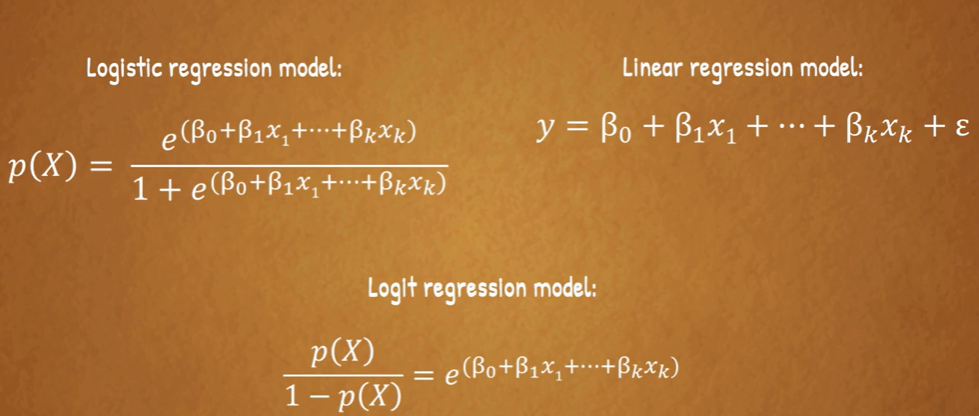


 odds = $\frac{p(x)}{1-p(x)}$ --> in a coin the odds are 1:1 in a dice 1:5

 **The log of the odds gives us the linear regression model**

We will analyze will be focused if a student will be admitted or not

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv(r'C:\Users\fxgibert\Desktop\Python\PythonProject\CSV\2.01.+Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


We must convert the Admitted data in 1 and 0 in order to analyze quantitative data.

In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [4]:
y = data['Admitted']
x1 = data['SAT']

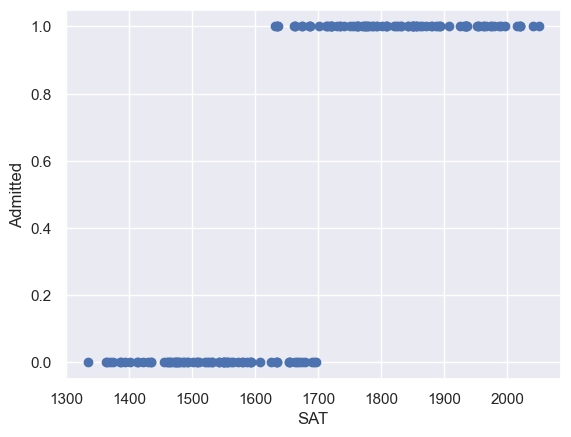

In [5]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

C:\Users\fxgibert\AppData\Local\Temp\ipykernel_18324\3064290284.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x1*results_lin.params[1]+results_lin.params[0]


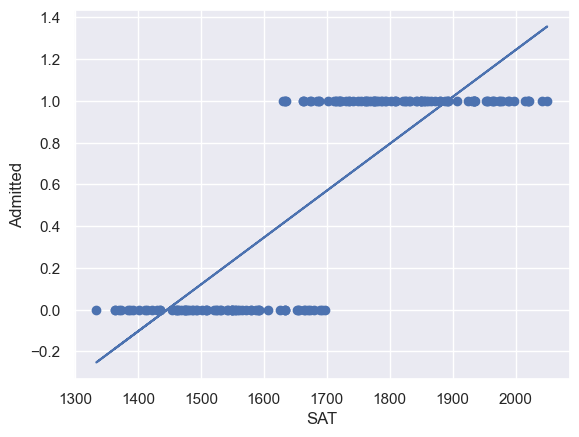

In [6]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y)
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat)
plt.xlabel('SAT')
plt.ylabel('Admitted')

plt.show()

Our data is non-linear so we should use non-linear approaches

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


C:\Users\fxgibert\AppData\Local\Temp\ipykernel_18324\2413750512.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1,results_log.params[0], results_log.params[1]))


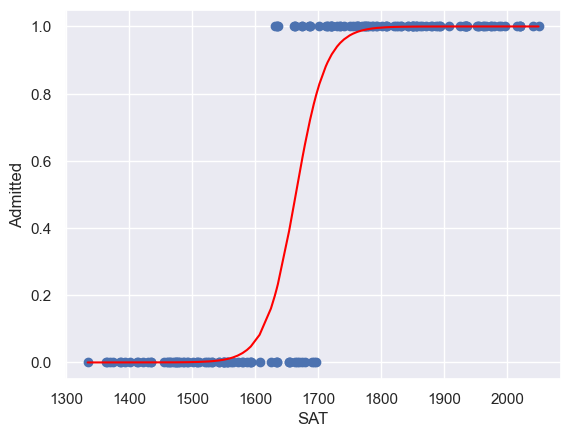

In [7]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y)
plt.plot(x_sorted,f_sorted, color = 'red')
plt.xlabel('SAT')
plt.ylabel('Admitted')

plt.show()

This function shows the probability of admission, given an SAT score.
When the SAT is relatively low is 0, when it is relatively high is 1.
Between 1600 and 1750 you can observe the probability of getting admitted


## BINARY PREDICTION!

### REGRESSION

In [8]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)

SM uses a ML algorithm to fit the regression

The function value shows the value of the objective function

In [9]:
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [10]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.7992
Time:                        09:16:07   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Now, we are going to analyze the previous table, the summary of the log model.

So the MLE is the Maximum Likelihood Estimation (MLE) which is based on the likelihood function that describes how likely it is that the model describes the real underlying relation of the variables. The bigger the likelihood function, the higher probability that the model is correct.

MLE tries to maximize the likelihood function.

It will optimize constantly until it finds a model for which the likelihood is the highest


**Log-Likelihood** is almost but not always negative, but the higher, the better!

**LL-null:** (log likelihood-null): the log-likelihood of a model which has no independent variables.The idea is to compare the log-likelihood of the model against the LL-null to see if the model has any explanatory power. 

In [11]:
x0 = np.ones(168)
reg_log = sm.Logit(y,x0)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:               7.410e-11
Time:                        09:16:07   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

LLR (log likelihood ratio): measures if our model is statistically different from LL-null, it gives us the LLR p-value, which is really small so our model is statistically relevant.

Pseudo R-squared: A good Pseudo R-squared is somewhere between 0.2 and 0.4.

This mesaures is mostly useful for comparing variations of the same model.

Different models will have completely different and incomparable Pseudo R-squares

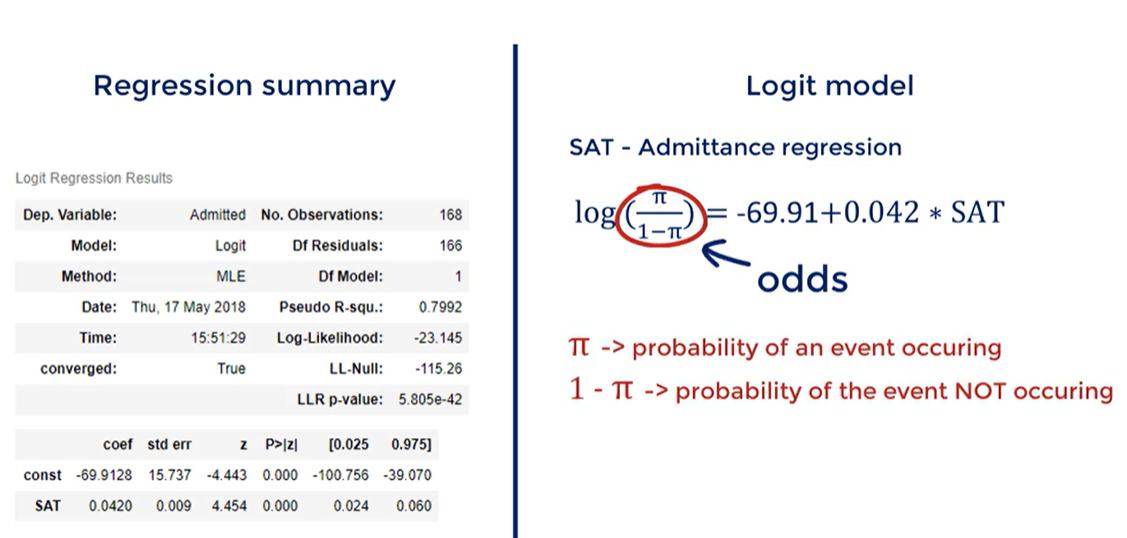

An increase in the odds = the exponential of the coefficient, like in the following image:

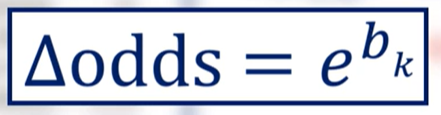

In [12]:
raw_data = pd.read_csv(r'C:\Users\fxgibert\Desktop\Python\PythonProject\CSV\2.02.+Binary+predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [13]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data['Gender'] = data['Gender'].map({'Female':1,'Male':0})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


In [14]:
y = data['Admitted']
x1 = data[['SAT','Gender']]
x = sm.add_constant(x1)

In [15]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log=reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.8249
Time:                        09:16:08   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The model is significant and the Gender variable is too

Model = log(odds) = -0.64 + 2.08*Gender

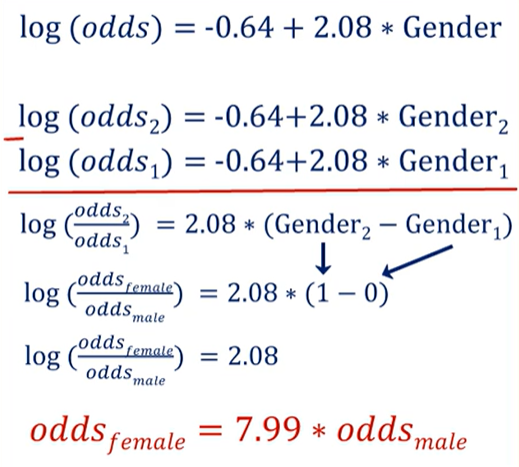

In [16]:
np.exp(results_log.params[2]) #Getting the Gender Coefficient we observe that a female has 7 times higher odds to get admitted

C:\Users\fxgibert\AppData\Local\Temp\ipykernel_18324\1166745893.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(results_log.params[2]) #Getting the Gender Coefficient we observe that a female has 7 times higher odds to get admitted


6.992863287539402

## Computing the Accuracy of the model

In [17]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [18]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [19]:
#Confusion MAtrix
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [20]:
# Confusion Matrix, shows how confused our model is
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0:'Actual 0', 1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


### How to interpret the confusion matrix

In [21]:
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


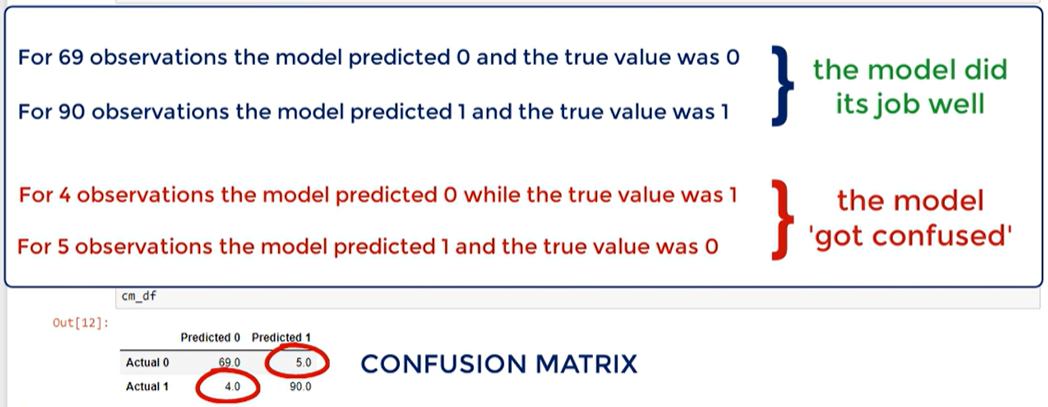

### We will calculate the accuracy 

In 159 cases the model did its job well

In 9 cases the model 'got confused'

TOTAL = 168 cases

In [22]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

### TESTING THE MODEL AND ASSESSING ITS ACCURACY

In [23]:
#It has the same structure but it is a division of the previous dataset
test = pd.read_csv(r'C:\Users\fxgibert\Desktop\Python\PythonProject\CSV\2.03.+Test+dataset.csv')
test.head()

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


In [24]:

test['Admitted'] = test['Admitted'].map({'Yes':1,'No':0})
test['Gender'] = test['Gender'].map({'Female':1,'Male':0})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


In [25]:
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


In [26]:
# We order the columns in the same order than the training dataset

test_actual = test['Admitted']
test_data = test.drop(['Admitted'],axis = 1)
test_data = sm.add_constant(test_data)
#test_data = test_data[x.columns.values]
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [27]:
def confusion_matrix(data,actual_values,model):

    #The regression model will perform predictions based on the data
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    #It will summarize the values on a table
    cm = np.histogram2d(actual_values,pred_values,bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracy

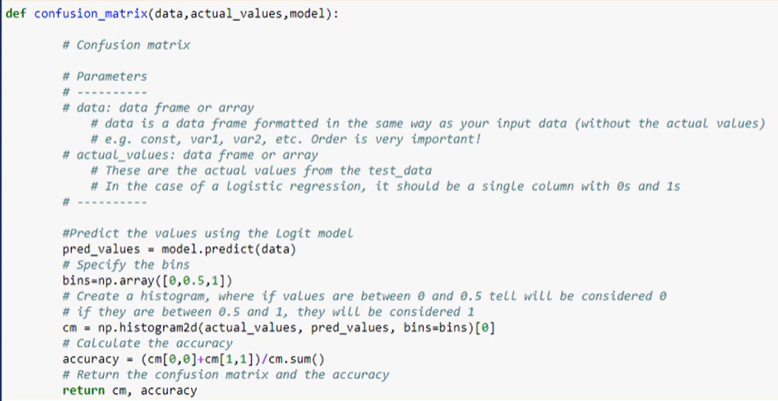

In [28]:
cm = confusion_matrix(test_data,test_actual,results_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

 ### Almost always the training accuracy is higher than the test accuracy

In [29]:
print('Missclassification rate: '+str((1+1)/19))

Missclassification rate: 0.10526315789473684
